# MSA 2025 Phase 2 - Part 1

In [126]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [127]:
# load three datasets in
W_store_features = pd.read_csv(
    r"D:\MSA_PROJECT\phase2_project\data-science\1. Analysis and Preprocessing\datasets\W store sales\features.csv"
    )
W_store_sales = pd.read_csv(
    r"D:\MSA_PROJECT\phase2_project\data-science\1. Analysis and Preprocessing\datasets\W store sales\sales.csv"
    )
W_store_stores = pd.read_csv(
    r"D:\MSA_PROJECT\phase2_project\data-science\1. Analysis and Preprocessing\datasets\W store sales\stores.csv"
    )

print(f'W_store_features has {W_store_features.shape[0]} rows')
print(f'W_store_sales has {W_store_sales.shape[0]} rows')
print(f'W_store_sales has {W_store_stores.shape[0]} rows')

W_store_features has 8190 rows
W_store_sales has 421570 rows
W_store_sales has 45 rows


In [128]:
# merge all three into one df 
# (one to many mapping,fault Cartesian product no need to concern)
df = pd.merge(W_store_features,W_store_sales,on = ["Store","Date"],how="inner")
df = pd.merge(df,W_store_stores, on = "Store", how = "inner")
print(f'df has {df.shape[0]} rows')

df has 421570 rows


In [129]:
# first 10 instances
df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False,A,151315
5,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,5749.03,False,A,151315
6,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,7,21084.08,False,A,151315
7,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,8,40129.01,False,A,151315
8,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,9,16930.99,False,A,151315
9,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10,30721.50,False,A,151315


In [130]:
df.describe(include='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
count,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570,421570,421570.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,3,NaN
top,NaN,2011-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,A,NaN
freq,NaN,3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391909,NaN,NaN,391909,215478,NaN
mean,22.200546,NaN,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,NaN,44.260317,15981.258123,NaN,NaN,136727.915739
std,12.785297,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,NaN,30.492054,22711.183519,NaN,NaN,60980.583328
min,1.000000,NaN,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,NaN,1.000000,-4988.940000,NaN,NaN,34875.000000
25%,11.000000,NaN,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,NaN,18.000000,2079.650000,NaN,NaN,93638.000000
50%,22.000000,NaN,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,NaN,37.000000,7612.030000,NaN,NaN,140167.000000
75%,33.000000,NaN,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,NaN,74.000000,20205.852500,NaN,NaN,202505.000000


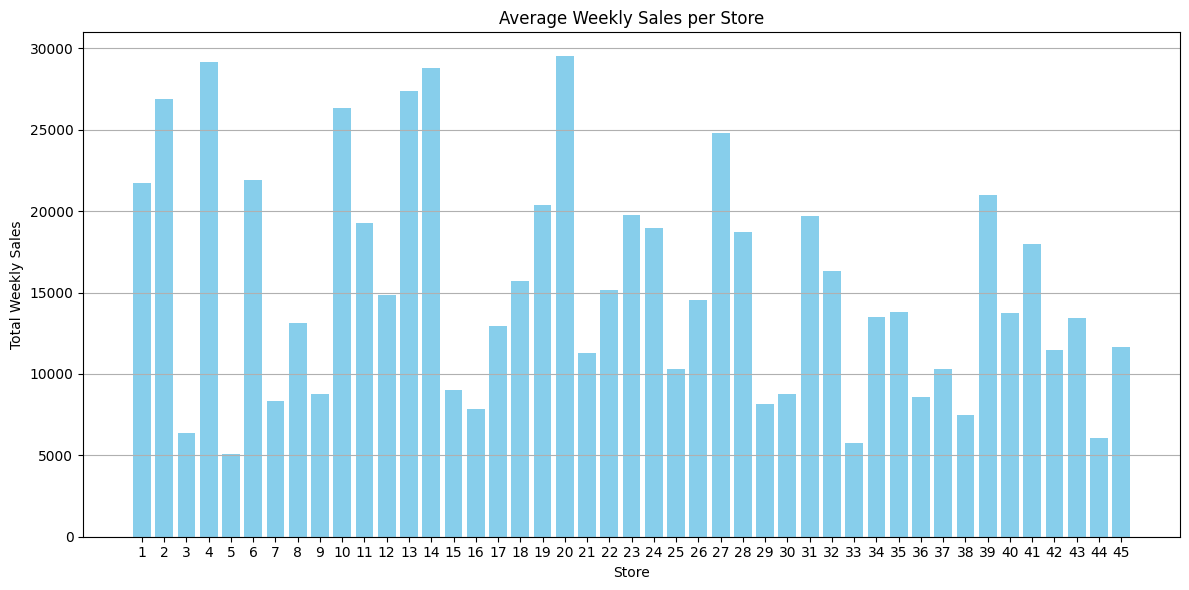

In [131]:
store_sales = df.groupby("Store")["Weekly_Sales"].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(store_sales["Store"], store_sales["Weekly_Sales"], color='skyblue')
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.xticks(store_sales["Store"]) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

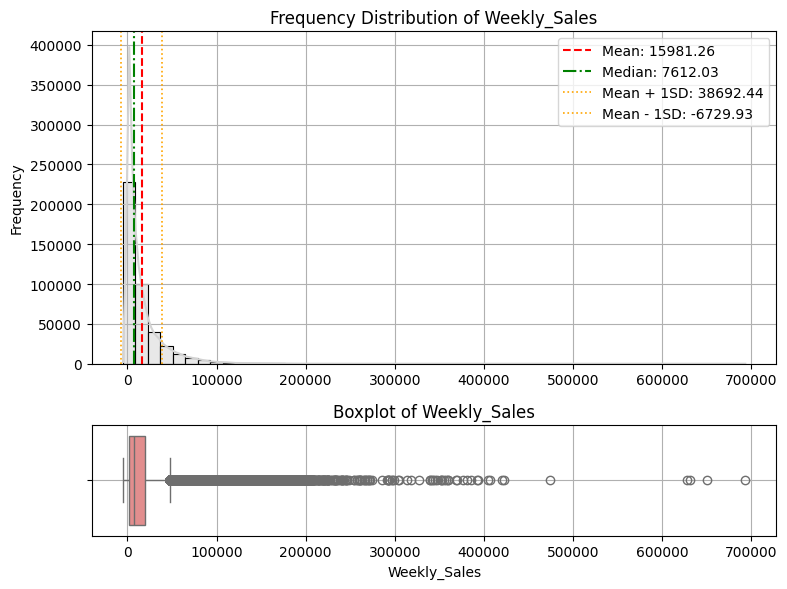

In [132]:
def show_distribution_with_stats(column):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})

    data = column.dropna()
    mean = data.mean()
    median = data.median()
    std = data.std()

    # hist
    sns.histplot(data, ax=axs[0], bins=50, kde=True,color='lightgrey')
    axs[0].axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {mean:.2f}")
    axs[0].axvline(median, color='green', linestyle='-.', linewidth=1.5, label=f"Median: {median:.2f}")
    axs[0].axvline(mean + std, color='orange', linestyle=':', linewidth=1.2, label=f"Mean + 1SD: {mean+std:.2f}")
    axs[0].axvline(mean - std, color='orange', linestyle=':', linewidth=1.2, label=f"Mean - 1SD: {mean-std:.2f}")
    axs[0].set_title(f"Frequency Distribution of {column.name}")
    axs[0].set_xlabel("")
    axs[0].set_ylabel("Frequency")
    axs[0].legend()
    axs[0].grid(True)

    # boxplot
    sns.boxplot(x=data, ax=axs[1], color='lightcoral')
    axs[1].set_title(f"Boxplot of {column.name}")
    axs[1].set_xlabel(column.name)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


show_distribution_with_stats(df["Weekly_Sales"])

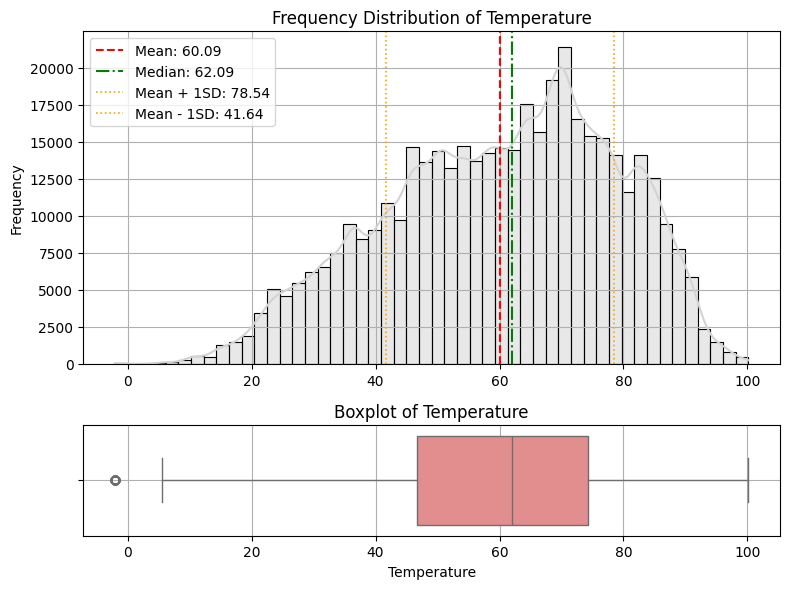

In [133]:

show_distribution_with_stats(df["Temperature"])


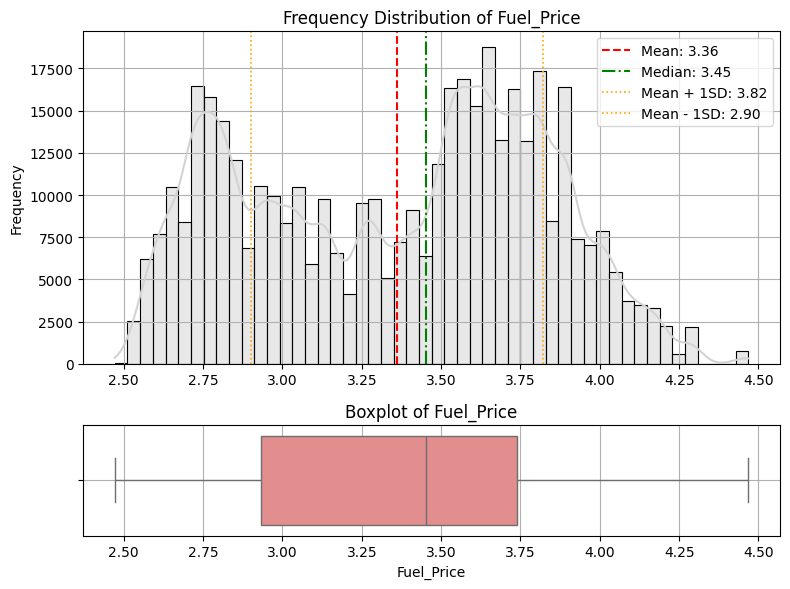

In [134]:
show_distribution_with_stats(df["Fuel_Price"])

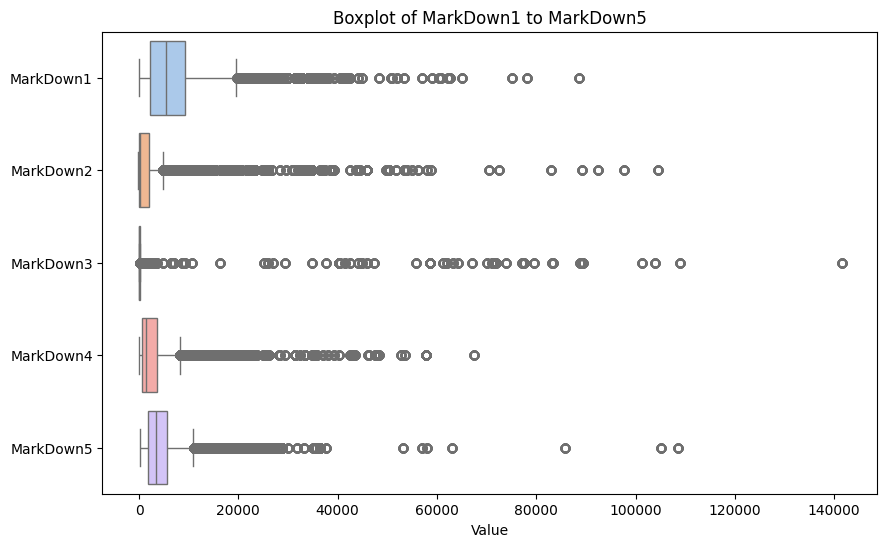

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[[f"MarkDown{i}" for i in range(1, 6)]], orient="h", palette="pastel")
plt.title("Boxplot of MarkDown1 to MarkDown5")
plt.xlabel("Value")
plt.show()

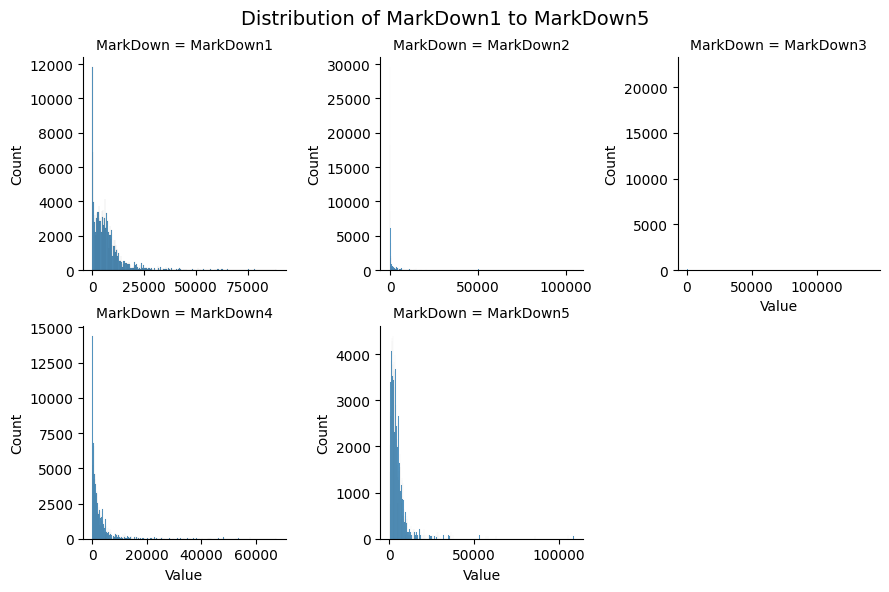

In [136]:
melted = df[[f"MarkDown{i}" for i in range(1, 6)]].melt(var_name="MarkDown", value_name="Value")

g = sns.FacetGrid(melted, col="MarkDown", col_wrap=3, height=3, sharex=False, sharey=False)
g.map(sns.histplot, "Value")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of MarkDown1 to MarkDown5", fontsize=14)
plt.show()

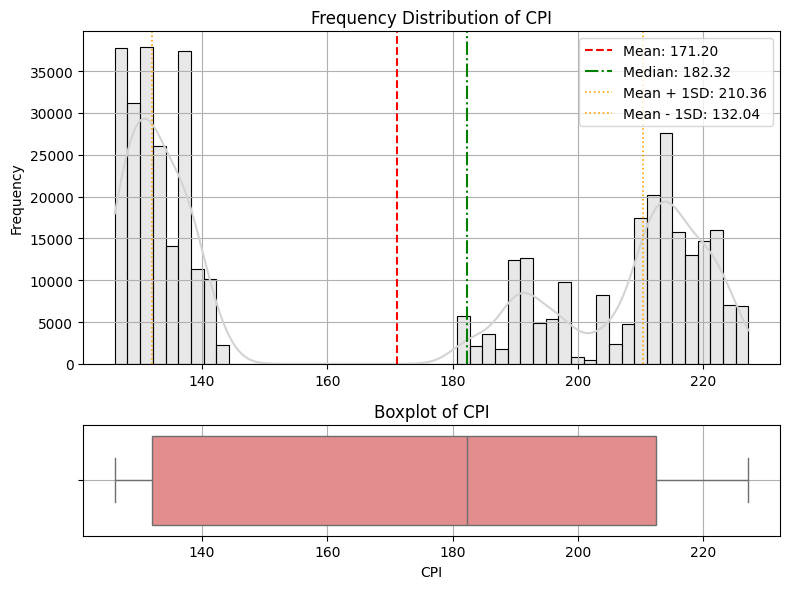

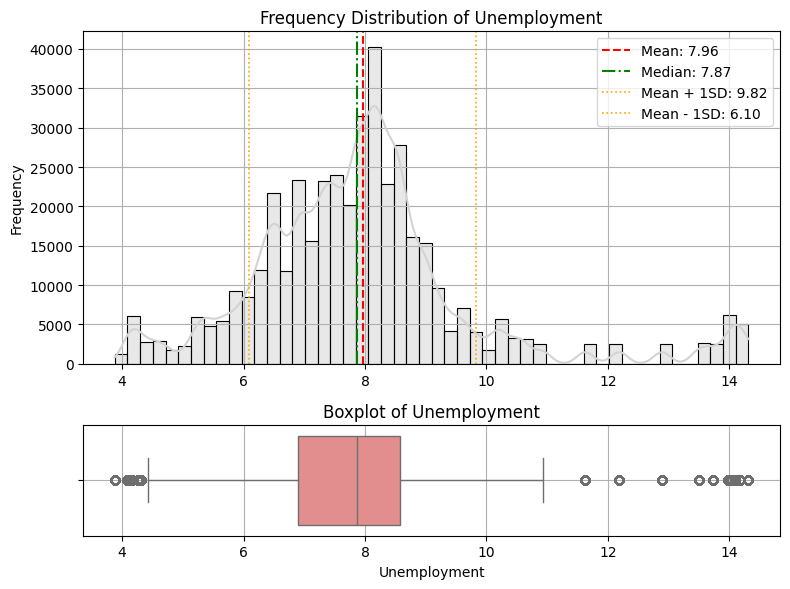

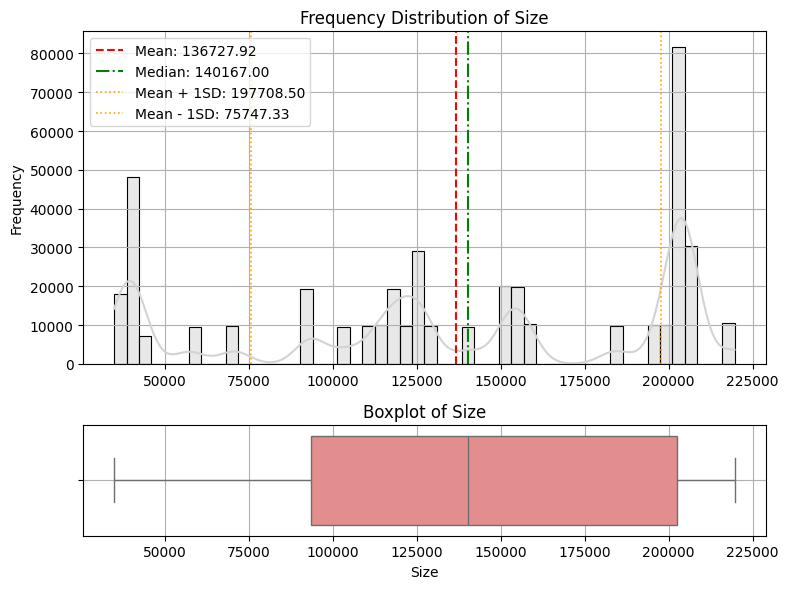

In [137]:
show_distribution_with_stats(df["CPI"])
show_distribution_with_stats(df["Unemployment"])
show_distribution_with_stats(df["Size"])

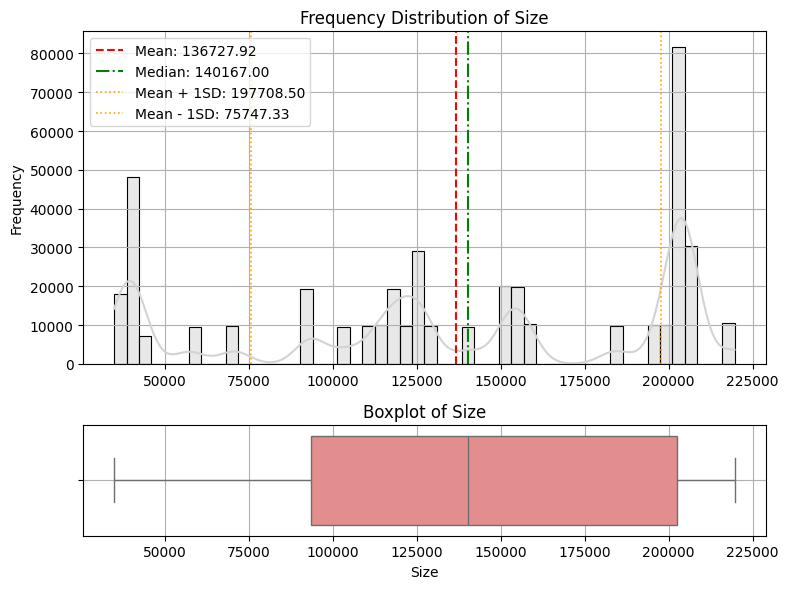

In [138]:
show_distribution_with_stats(df["Size"])

In [149]:

df = df.drop(columns=["IsHoliday_y"]).rename(columns={"IsHoliday_x": "IsHoliday"})
df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Dept                     int64
Weekly_Sales           float64
Type                    object
Size                     int64
dtype: object

## 2. Visualise data

In [150]:
#
df["Date"] = pd.to_datetime(df["Date"])

df_daily = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

df_weekly = df.resample("W-MON", on="Date")["Weekly_Sales"].sum().reset_index()

df_monthly = df.resample("M", on="Date")["Weekly_Sales"].sum().reset_index()

df_quarterly = df.resample("Q", on="Date")["Weekly_Sales"].sum().reset_index()

df_yearly = df.resample("Y", on="Date")["Weekly_Sales"].sum().reset_index()


C:\Users\Wade Yan\AppData\Local\Temp\ipykernel_2908\3748208975.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample("M", on="Date")["Weekly_Sales"].sum().reset_index()
C:\Users\Wade Yan\AppData\Local\Temp\ipykernel_2908\3748208975.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample("Q", on="Date")["Weekly_Sales"].sum().reset_index()
C:\Users\Wade Yan\AppData\Local\Temp\ipykernel_2908\3748208975.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample("Y", on="Date")["Weekly_Sales"].sum().reset_index()


In [151]:
def aggregate_and_plot(df, date_col, value_col, freq="W", title=None):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col]) 

    df_agg = df.resample(freq, on=date_col)[value_col].sum().reset_index()

    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df_agg, x=date_col, y=value_col)
    plt.title(title or f"{value_col} Aggregated by {freq}")
    plt.xlabel("Date")
    plt.ylabel(f"Total {value_col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



C:\Users\Wade Yan\AppData\Local\Temp\ipykernel_2908\1105477887.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_agg = df.resample(freq, on=date_col)[value_col].sum().reset_index()


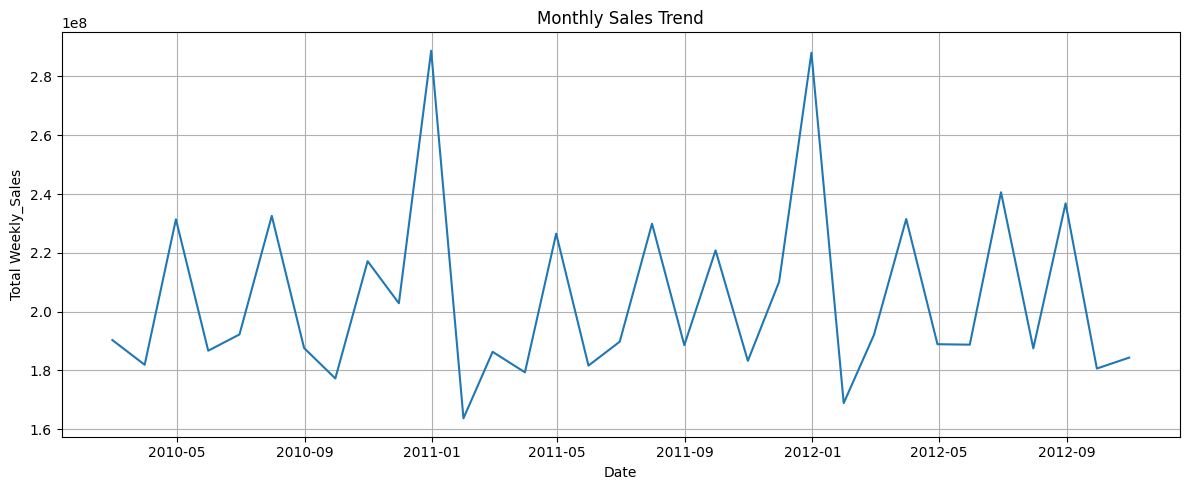

In [152]:
aggregate_and_plot(df, date_col="Date", value_col="Weekly_Sales", freq="M", title="Monthly Sales Trend")

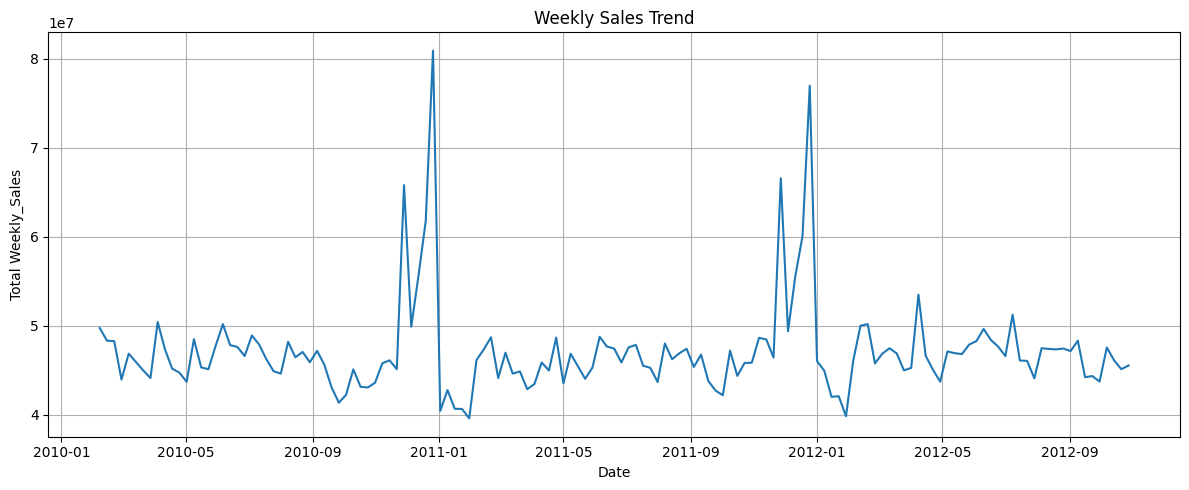

In [153]:
aggregate_and_plot(df, date_col="Date", value_col="Weekly_Sales", freq="W", title="Weekly Sales Trend")

C:\Users\Wade Yan\AppData\Local\Temp\ipykernel_2908\1105477887.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_agg = df.resample(freq, on=date_col)[value_col].sum().reset_index()


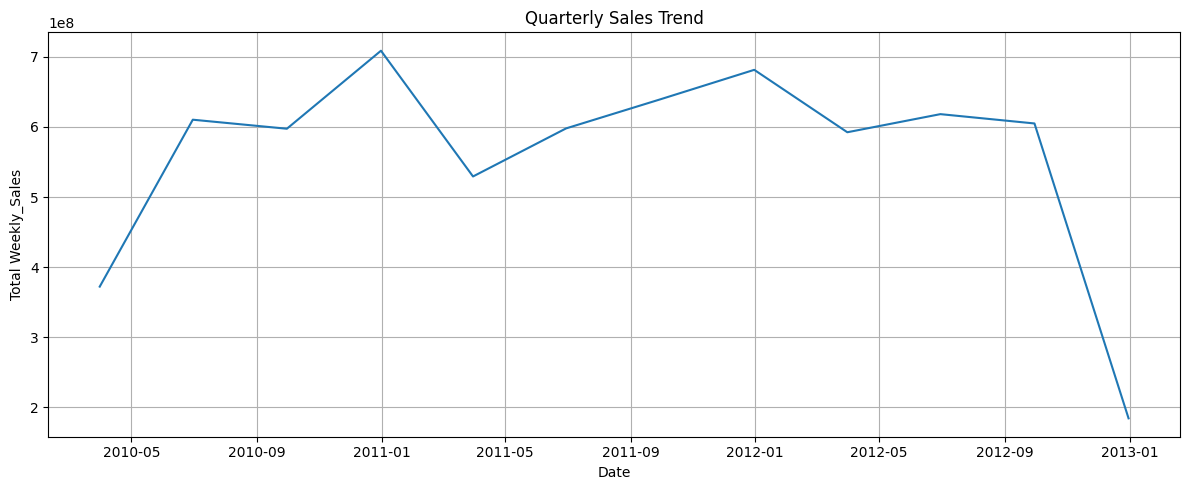

In [154]:
aggregate_and_plot(df, date_col="Date", value_col="Weekly_Sales", freq="Q", title="Quarterly Sales Trend")

C:\Users\Wade Yan\AppData\Local\Temp\ipykernel_2908\1105477887.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_agg = df.resample(freq, on=date_col)[value_col].sum().reset_index()


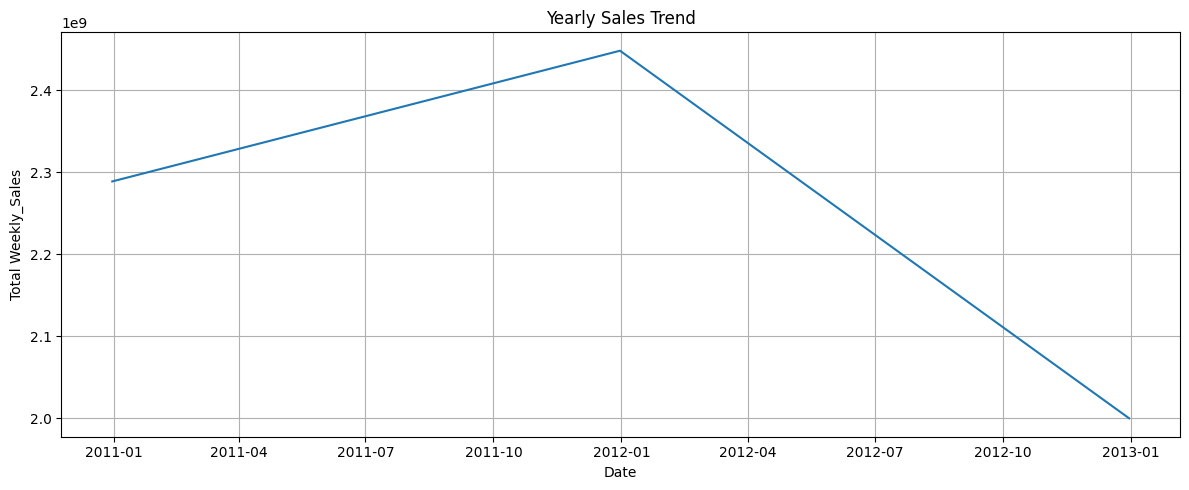

In [155]:
aggregate_and_plot(df, date_col="Date", value_col="Weekly_Sales", freq="Y", title="Yearly Sales Trend")

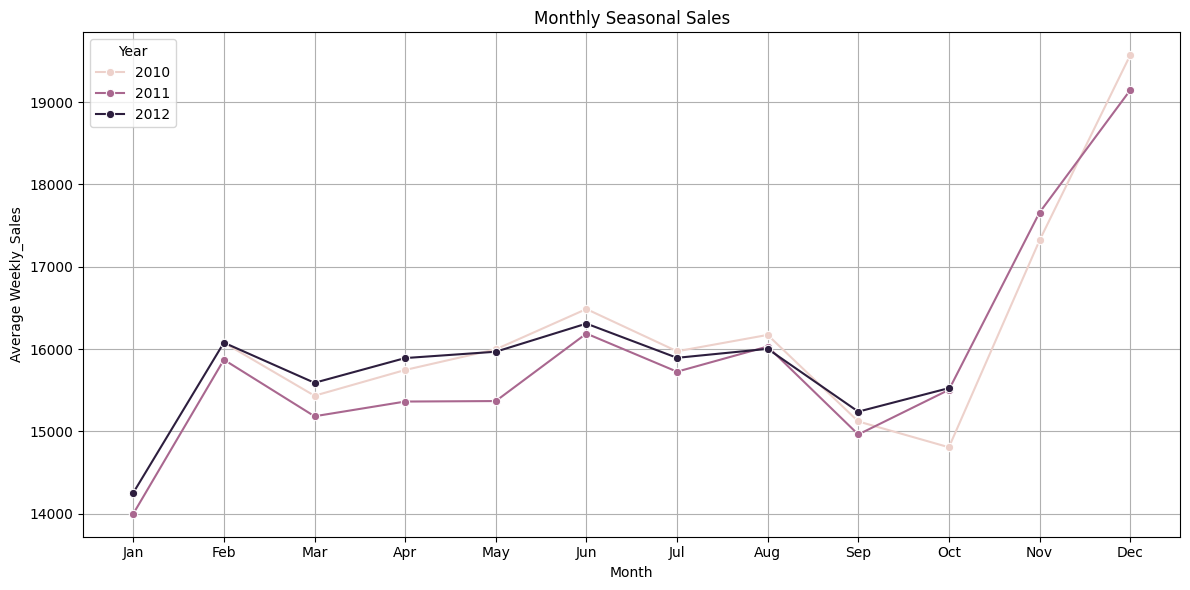

In [156]:
def seasonal_plot(df, date_col, value_col, freq="M", title=None):

    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df["Year"] = df[date_col].dt.year

  
    if freq == "M":
        df["Period"] = df[date_col].dt.month
        period_label = "Month"
    elif freq == "Q":
        df["Period"] = df[date_col].dt.quarter
        period_label = "Quarter"
    elif freq == "W":
        df["Period"] = df[date_col].dt.isocalendar().week
        period_label = "Week"
    else:
        raise ValueError("只支持 freq='M', 'Q', 'W'")


    seasonal_avg = df.groupby(["Year", "Period"])[value_col].mean().reset_index()


    plt.figure(figsize=(12, 6))
    sns.lineplot(data=seasonal_avg, x="Period", y=value_col, hue="Year", marker="o")
    plt.title(title or f"Seasonal Plot of {value_col} by {period_label}")
    plt.xlabel(period_label)
    plt.ylabel(f"Average {value_col}")
    if freq == "M":
        plt.xticks(ticks=range(1, 13), labels=[
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
seasonal_plot(df, date_col="Date", value_col="Weekly_Sales", freq="M", title="Monthly Seasonal Sales")

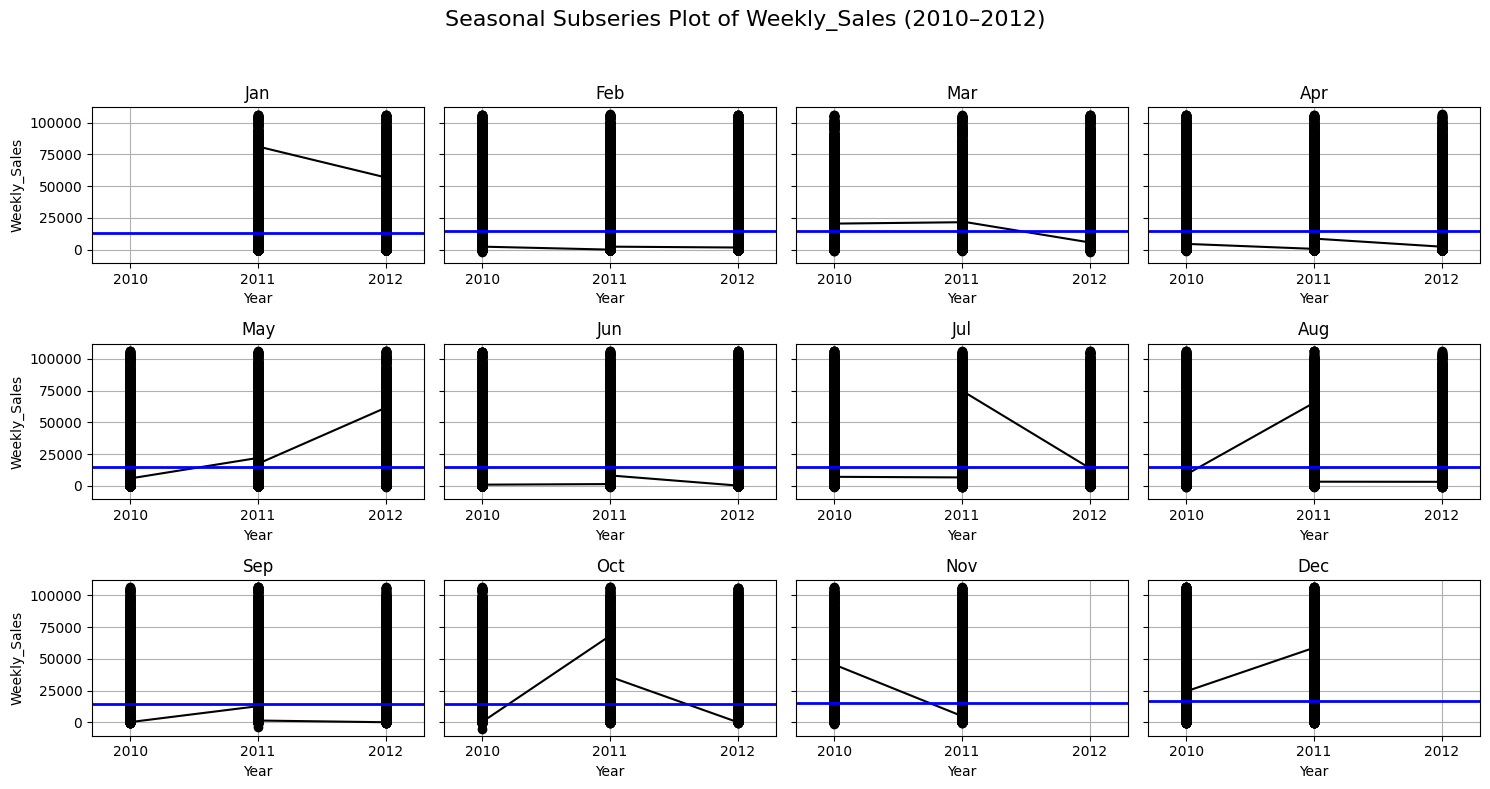

In [ ]:

def seasonal_subseries_plot_beautified(df, date_col, value_col):
    """
    美化版：限定横坐标为2010–2012，确保年份整数、取消2013刻度，提高可视化效果
    """
    df = df.copy()


    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col])
    df["Year"] = df[date_col].dt.year
    df["Month"] = df[date_col].dt.month


    df = df[(df["Year"] >= 2010) & (df["Year"] <= 2012)]

    cap = df[value_col].quantile(0.99)
    df = df[df[value_col] <= cap]

    valid_years = df.groupby("Year")["Month"].nunique()
    valid_years = valid_years[valid_years >= 10].index
    df = df[df["Year"].isin(valid_years)]


    fig, axs = plt.subplots(3, 4, figsize=(15, 8), sharey=True)
    axs = axs.flatten()

    for month in range(1, 13):
        ax = axs[month - 1]
        sub_df = df[df["Month"] == month].sort_values("Year").copy()
        mean_val = sub_df[value_col].mean()

        sub_df["Year"] = sub_df["Year"].astype(int)

        ax.plot(sub_df["Year"], sub_df[value_col], marker='o', linestyle='-', color="black")
        ax.axhline(mean_val, color='blue', linestyle='-', linewidth=2)

        ax.set_title(calendar.month_abbr[month])
        ax.set_xlabel("Year")
        ax.set_xticks([2010, 2011, 2012])
        ax.set_xlim(2009.7, 2012.3)  
        if month in [1, 5, 9]:
            ax.set_ylabel(value_col)
        ax.grid(True)

    plt.suptitle(f"Seasonal Subseries Plot of {value_col} (2010–2012)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


seasonal_subseries_plot_beautified(df, date_col="Date", value_col="Weekly_Sales")


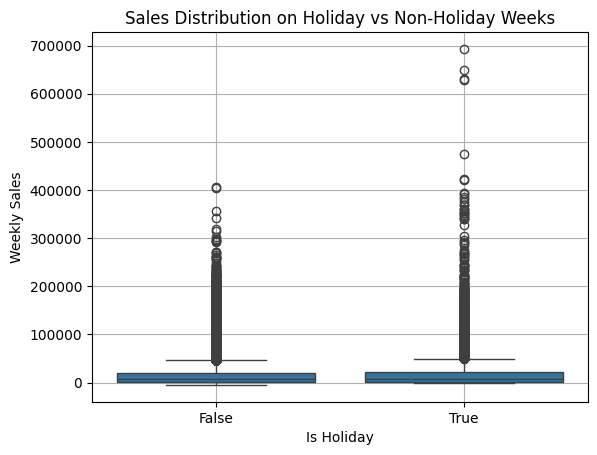

In [158]:
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=df)
plt.title("Sales Distribution on Holiday vs Non-Holiday Weeks")
plt.xlabel("Is Holiday")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


## 3. Clean data

In [159]:
#

## 4. Identify correlated variables

In [160]:
#

## 5. Summary